# Business Intelligence Lab 03 : Clustering to find ikea optimal location

## Name - Ajay D Nair h24ajana@du.se

## Loading all required functions

In [22]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


## Loading dataset

In [23]:
df = pd.read_csv("C:/Users/ajaxc/Downloads/ikea_kommun_data.txt", delimiter='\t', encoding='latin1')
df.head()

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
0,2583,2010,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1
1,880,2010,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0
2,1780,2010,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0
3,114,2010,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0
4,115,2010,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0


## Choosing columns and normalising

In [24]:
## checking for null values
df.isnull()

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
202,False,False,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,False,False
204,False,False,False,False,False,False,False,False,False,False,False,False
205,False,False,False,False,False,False,False,False,False,False,False,False


In [25]:
df.describe()

,Kommun_code,Year,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
count,207.000000,207.0,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,1049.734300,2010.0,1031.801932,523.038647,34543.396135,4660.106280,0.097461,91.454002,106.315583,0.048309,0.038647
std,541.065455,0.0,2694.889549,1463.194427,66882.499740,14403.495784,0.040760,27.960867,277.678055,0.214939,0.193220
min,114.000000,2010.0,11.000000,2.000000,3672.000000,174.000000,0.046142,19.898880,1.133426,0.000000,0.000000
25%,582.500000,2010.0,110.000000,64.500000,10785.500000,788.500000,0.069015,74.700910,11.334263,0.000000,0.000000
50%,1263.000000,2010.0,252.000000,142.000000,16515.000000,1598.000000,0.086601,90.457050,25.965765,0.000000,0.000000
75%,1461.500000,2010.0,825.500000,435.000000,37922.000000,4073.500000,0.112085,104.008805,85.058489,0.000000,0.000000
max,2583.000000,2010.0,32897.000000,18795.000000,847073.000000,191585.000000,0.269646,275.636330,3389.665819,1.000000,1.000000


In [26]:
# make df with only numerical columns which matter
df_numerical = df[[ 'Revenue','Population', 'Population_University', 'Infrast','Border']]
df_numerical.head()

,Revenue,Population,Population_University,Infrast,Border
0,1078,10059,719,0,1
1,3790,62815,8716,0,0
2,4560,85753,13308,0,0
3,1366,39289,4419,0,0
4,171,30114,3843,0,0


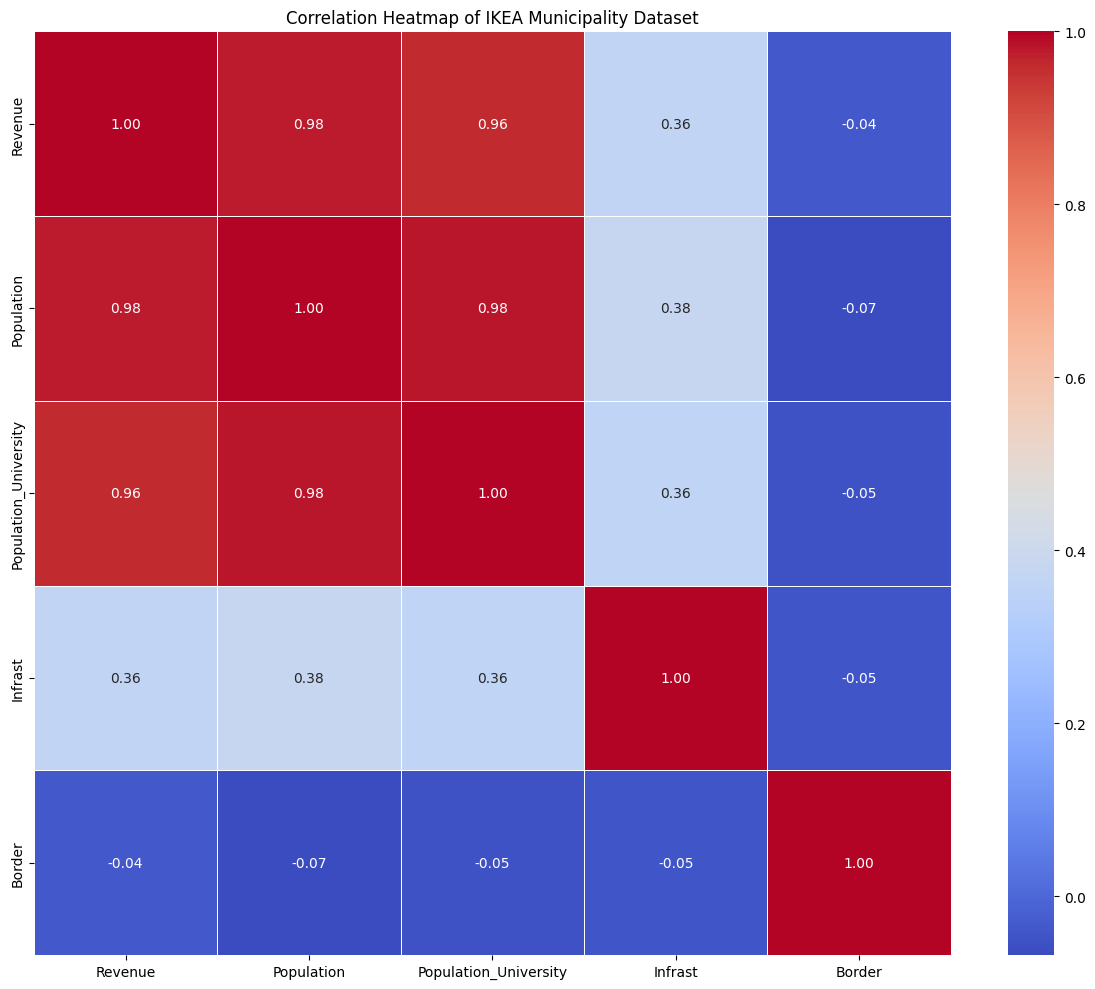

In [27]:
# Compute the correlation matrix
corr_matrix = df_numerical.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of IKEA Municipality Dataset')
plt.tight_layout()
plt.savefig('ikea_correlation_heatmap.png', dpi=300)
plt.show()


From Correlation Heatmap we can see that all variables are correlated to each other, Infrastructure having slight positive correlation and Border having a slight negative correlation.We should choose either one of the variables or one combining with Border and Infrastructure.However PCA handles correlation , combining correlated variables into uncorrelated components 

In [28]:

# Step 7: Normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)



## Appply PCA

In [29]:

# Step 8: Apply PCA to retain 95% of variance
pca = PCA(n_components=0.95)
df_pca = pca.fit_transform(df_scaled)




PCA helps reduce dimensionality which is used to determine clusters

## Determine Optimal clusters

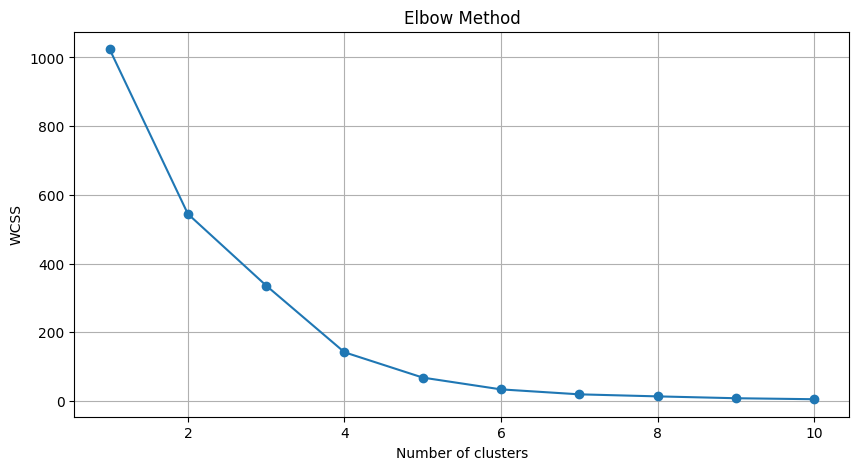

In [30]:

# Step 9: Elbow method to determine optimal clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


optimal clusters as seen from the plot is at 4 , where the elbow forms. The intra cluster variation decreases from point 4 , hence this should be the optimum no of clusters with which kmeans should be applied to fin clusters

## Applying KMeans with 4 clusters

In [31]:

# Step 10: Apply KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(df_pca)


In [32]:
df.head()

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,Cluster
0,2583,2010,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1,3
1,880,2010,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0,0
2,1780,2010,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0,0
3,114,2010,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0,0
4,115,2010,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0,0


In [33]:

import plotly.express as px
# Assume df already has 'Kommun_name' and 'Cluster' columns
fig = px.scatter(
    x=df_pca[:, 0],
    y=df_pca[:, 1],
    color=df['Cluster'].astype(str),
    hover_name=df['Kommun_name'],
    labels={'x': 'Principal Component 1', 'y': 'Principal Component 2'},
    title='Clusters of Municipalities (PCA)'
)

fig.update_traces(marker=dict(size=8, opacity=0.7), selector=dict(mode='markers'))
fig.update_layout(width=800, height=600)
fig.show()


Well distinct clusters formed

## Finding location for ikea store

In [34]:
# Step 12: Explore clusters
df_numerical['Cluster'] = df['Cluster']
cluster_summary = df_numerical.groupby('Cluster').mean()
print("Cluster Summary:\n", cluster_summary)

Cluster Summary:
               Revenue     Population  Population_University  Infrast  Border
Cluster                                                                     
0          821.894180   29521.904762            3598.751323      0.0     0.0
1         2317.222222   69779.333333            9496.111111      1.0     0.0
2        32897.000000  847073.000000          191585.000000      1.0     0.0
3          561.625000   11969.500000             928.500000      0.0     1.0


C:\Users\ajaxc\AppData\Local\Temp\ipykernel_17736\1899096538.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



cluster_summary helps us understand statistics according to which we can choose clusters

In [35]:

# Step 13: Filter out municipalities with IKEA

excluded_municipalities = ['Uppsala', 'Örebro','Linköping','Jönköping','Borlänge', 'Gävle', 'Göteborg',
'Haparanda', 'Helsingborg', 'Kalmar', 'Karlstad', 'Malmö', 'Stockholm', 'Sundsvall',
'Uddevalla', 'Umeå', 'Västerås', 'Älmhult','Järfälla' ]   # as they have ikea
df_filtered = df[
    df['Cluster'].isin([0,1]) &
    (~df['Kommun_name'].isin(excluded_municipalities))
]

# Step 14: Suggest top 3 candidates for new IKEA stores
top_candidates = df_filtered.nlargest(3, ['Revenue', 'Population'])
print("Top 3 Candidates for New IKEA Stores:\n", top_candidates)


Top 3 Candidates for New IKEA Stores:
      Kommun_code  Year Kommun_name  Revenue  Employee  Population  \
9            126  2010    Huddinge     7153      2374       97453   
53           581  2010  Norrköping     4438      2630      130050   
132         1382  2010  Falkenberg     4395      2035       41008   

     Population_University  Percent_University  Productivity  SalesIndex  \
9                    12795            0.131294     151.00150  737.036192   
53                   14526            0.111696      84.56785  457.285981   
132                   3396            0.082813     108.23513  452.855314   

     Infrast  Border  Cluster  
9          0       0        0  
53         0       0        0  
132        0       0        0  


Choice of clusters = 2 is stockholm and 3 has least revenue and population. Hence we choose 0 and 1.

While filtering used Reenue first and then Population as businesses always thrive on the revenue while having a decent population.

**Huddinge** is nearby Stockholm bt owing to its high population it will be a good location. I included **Jarfalla** in excluded municipalities which already have ikea as there is an ikea in Barkaby which is very near.**Norrköping** is also a highly populated area , it has an Ikea in Linköping nearby but still an Ikea in Norrköping will be a good idea owing to its population. Of all these **Falkenberg** is the least populated in top 3 however there is  good revenue stream from here and thats why its a great idea.

There is still the limitation of distance and non availibilty of all municipalities data. Probably more data could help, however ikea being an innovative company would have already designated stores in best locations and with availiability of more and more data they could open more stores on optimised locations.